# Lecture 2

### California Test Score Data Set

The California Standardized Testing and Reporting data set contains data on test performance, school characteristics, and student demographic backgrounds. 

Test scores are the average of the reading and math scores. The student–teacher ratio used here is the number of students in the district divided by the number of full-time equivalent teachers.

The demographic variables include the percentage of students who are in the public assistance program CalWorks, the percentage of students who qualify for a reduced-price lunch, and the percentage of students who has English as a second language.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

First let's upload the data set with the pandas function <b>pd.read_excel</b> and assign the data set to an object called <b>caschool</b>

In [3]:
caschool = pd.read_excel('caschool.xlsx')

Let's see what the data set looks like

In [4]:
caschool

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000


Suppose we wish to investigate if there is a difference in test scores for school districts with student-to-teacher ratios greater or less than 20 (small vs large class sizes).

For that, we separate our data set in two groups.

This is done by slicing the object <b>caschool</b> based on a condition.

   For all districts where str<=20 a new object called <b>caschool_l20</b> will be created.

   For all districts where str>20 a new object called <b>caschool_u20</b> will be created.

In [5]:
# Separating counties with teacher-pupil ratio less or equals 20 and greater than 20
caschool_l20 = caschool[caschool["str"]<=20]
caschool_u20 = caschool[caschool["str"]>20]

Let's visualize the object <b>caschool_l20</b> and check if it contains only districts with "str" less than 20

In [6]:
caschool_l20

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,68981,San Mateo,Portola Valley Elementary,KK-08,687,44.590000,0.304900,0.000000,209,699.099976,0.304221,7217.263184,15.407042,50.676998,1.164483,698.299988,699.900024
414,415,69682,Santa Clara,Saratoga Union Elementary,KK-08,2341,124.089996,0.170900,0.598000,286,700.300049,0.122170,5392.638672,18.865339,40.402000,2.050406,698.900024,701.700012
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000


<b> What is the sample average test score for each of the groups? <b/>
    
To find the mean of test scores we use the numpy function <b>np.mean</b> over the column "testscr".

In [7]:
# Calculating the Sample Mean Test Scores
testscr_mean_l20 = np.mean(caschool_l20["testscr"])
testscr_mean_u20 = np.mean(caschool_u20["testscr"])

print("The sample mean Test Scores are", round(testscr_mean_l20,2),"for the group with STR<=20 and",round(testscr_mean_u20,2),"for the group with STR>20")

The sample mean Test Scores are 657.18 for the group with STR<=20 and 650.0 for the group with STR>20


<b> What is the standard error of the sample average test score for each of the groups? <b/>
    
To find the standard deviation of test scores, we use the numpy function <b>np.std</b> over the column "testscr".
    
The standard error is the standard deviation divided by the squared-root of the sample size.

In [8]:
# Calculating the Standard Error for the sample mean Test Scores

testscr_std_l20 = np.std(caschool_l20["testscr"])
testscr_std_u20 = np.std(caschool_u20["testscr"])

n_l20 = len(caschool_l20["testscr"])
n_u20 = len(caschool_u20["testscr"])

testscr_se_l20 = testscr_std_l20/np.sqrt(n_l20)
testscr_se_u20 = testscr_std_u20/np.sqrt(n_u20)

print("The standard error for the sample mean Test Scores are",round(testscr_se_l20,2),"for the group with STR<=20 and",round(testscr_se_u20,2),"for the group with STR>20")

The standard error for the sample mean Test Scores are 1.23 for the group with STR<=20 and 1.35 for the group with STR>20


<b> Construct a 95% confidence interval for the mean test scores of each group <b/>

In [9]:
# Finding the 95% conficence interval of Mean Test Scores (str<=20)

ll_testscr_l20 = testscr_mean_l20 - 1.96*testscr_se_l20
ul_testscr_l20 = testscr_mean_l20 + 1.96*testscr_se_l20

# Finding the 95% conficence interval of Mean Test Scores (str>20)

ll_testscr_u20 = testscr_mean_u20 - 1.96*testscr_se_u20
ul_testscr_u20 = testscr_mean_u20 + 1.96*testscr_se_u20

print("The 95% confidence interval for mean test scores (str<=20) is", round(ll_testscr_l20,2),"to",round(ul_testscr_l20,2))

print("The 95% confidence interval for mean test scores (str>20) is", round(ll_testscr_u20,2),"to",round(ul_testscr_u20,2))

The 95% confidence interval for mean test scores (str<=20) is 654.76 to 659.6
The 95% confidence interval for mean test scores (str>20) is 647.36 to 652.64


<b> Construct a 95% confidence interval for the differnce of mean test scores of each group <b/>

In [10]:
# Finding the Standard error of the difference of mean Average Hourly Earnings 
testscr_se_diff = np.sqrt(testscr_se_l20**2+testscr_se_u20**2)

# Finding the 95% conficence interval of the difference of mean Average Hourly Earnings 
ll_testscr_diff = testscr_mean_l20 - testscr_mean_u20 - 1.96*testscr_se_diff
ul_testscr_diff = testscr_mean_l20 - testscr_mean_u20 + 1.96*testscr_se_diff

print("The 95% confidence interval for the difference of mean test scores is", round(ll_testscr_diff,2),"to",round(ul_testscr_diff,2))

The 95% confidence interval for the difference of mean test scores is 3.6 to 10.77


<b> Find the correlation between test scores and student-to-teacher ratio and create a scatterplot. </b>

In [11]:
caschool.get(["testscr","str"]).corr()

,testscr,str
testscr,1.000000,-0.226363
str,-0.226363,1.000000


<AxesSubplot:xlabel='str', ylabel='testscr'>

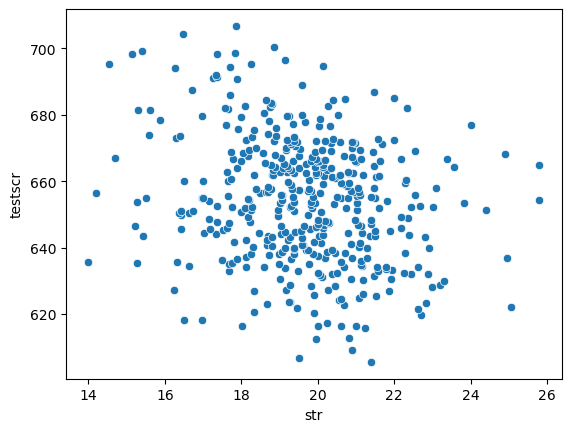

In [12]:
sn.scatterplot(data=caschool, x="str", y="testscr")